In [ ]:
#Install library:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install scikit-learn
!pip install matplotlib

In [ ]:
# Import library:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Mengatur lebar kolom maksimum
pd.set_option('display.max_colwidth', 100)
# Mengaktifkan fungsi untuk menampilkan plot di dalam notebook Jupyter
%matplotlib inline

In [ ]:
# Membaca dataset
url = 'https://github.com/shnay03/Proses-Analisis-Studi-Kasus-Penyakit-Jantungs/blob/main/heart_disease_prediction.csv/?raw=True'
heart_df = pd.read_csv(url)

In [ ]:
# Menampilkan dataset teratas
heart_df.head(5).T

,0,1,2,3,4
Age,40,49,37,48,54
Sex,M,F,M,F,M
ChestPainType,ATA,NAP,ATA,ASY,NAP
RestingBP,140,160,130,138,150
Cholesterol,289,180,283,214,195
FastingBS,0,0,0,0,0
RestingECG,Normal,Normal,ST,Normal,Normal
MaxHR,172,156,98,108,122
ExerciseAngina,N,N,N,Y,N
Oldpeak,0.0,1.0,0.0,1.5,0.0


In [ ]:
print(f'Jumlah fitur: {heart_df.shape[1]}')
print(f'Jumlah observasi: {heart_df.shape[0]}')

Jumlah fitur: 12
Jumlah observasi: 918


In [ ]:
# Periksa tipe data fitur-fitur
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
# Describe Data
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Menghitung missing values pada semua kolom
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

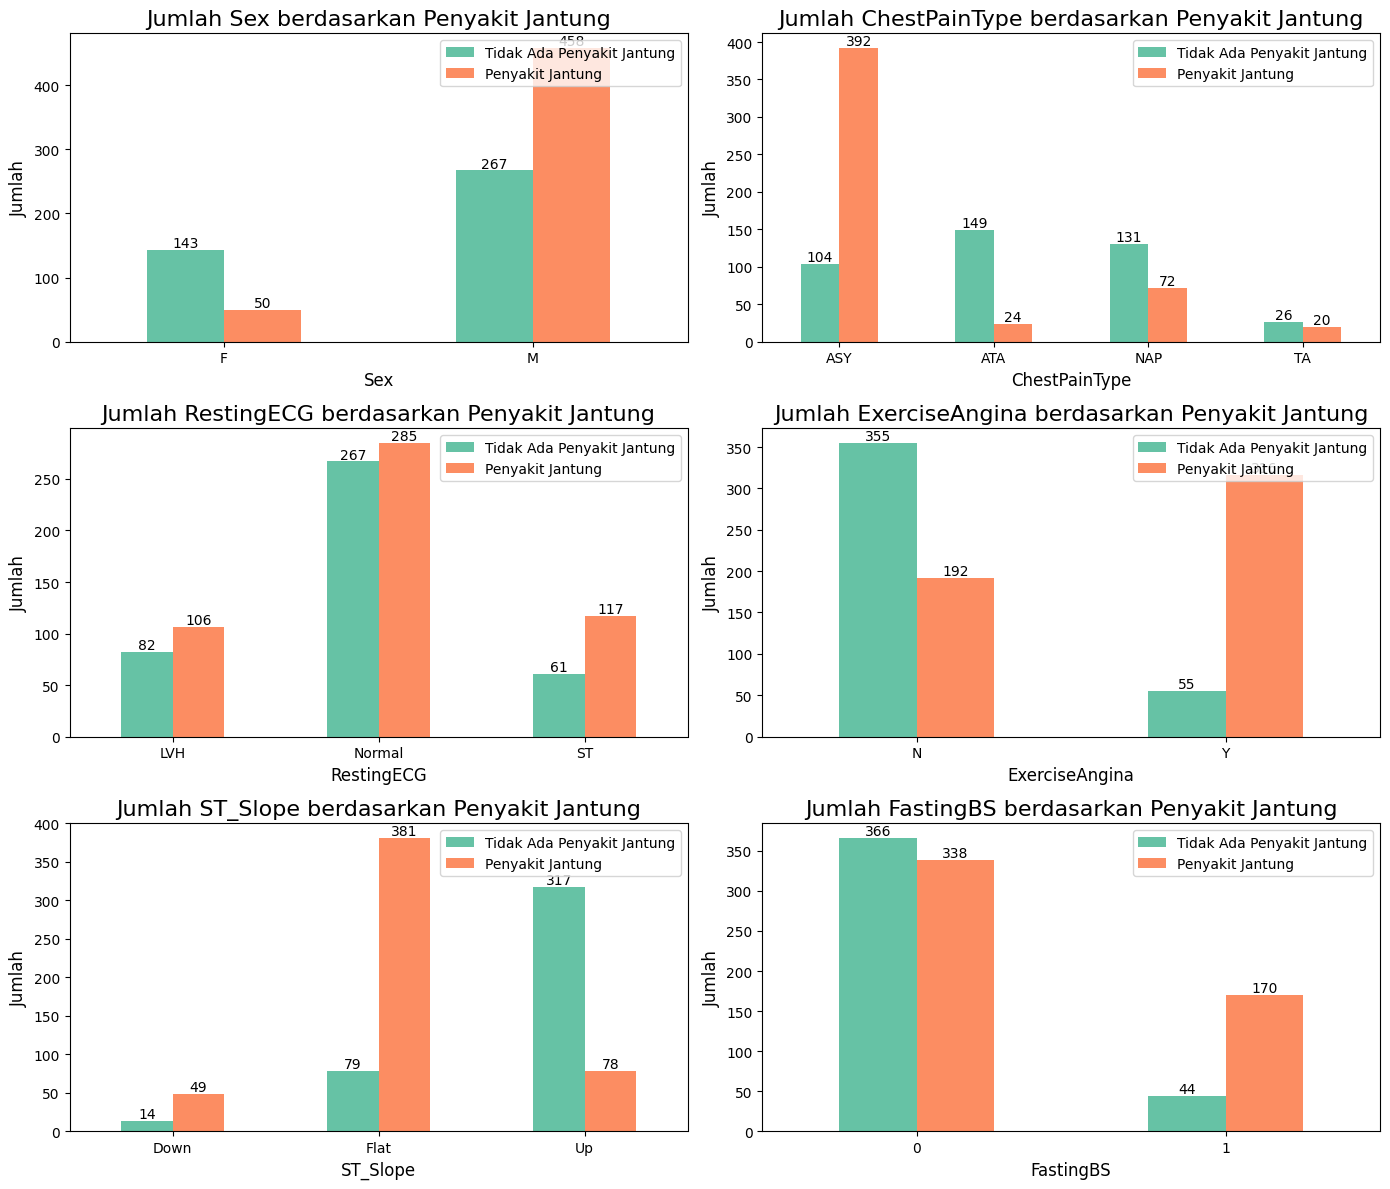

In [ ]:
# Visualisasi Perbandingan Jumlah Kategori pada Kolom Fitur, Dikelompokkan Berdasarkan Kondisi Penyakit Jantung
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']

# Mengatur objek gambar dan sumbu
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,12))

# Mengatur Palet Wana
colors = plt.get_cmap('Set2')

# Ulangi kolom kategorikal dan buat diagram batang untuk setiap kolom
for i, col in enumerate(cat_cols):
    # Menghitung indeks baris dan kolom untuk subplot saat ini
    row_idx = i // 2
    col_idx = i % 2

    counts = heart_df.groupby(['HeartDisease', col]).size().reset_index(name='count')

    # Membuat diagram batang
    ax = counts.pivot(index=col, columns='HeartDisease', values='count').plot(kind='bar', ax=axes[row_idx, col_idx], rot=0, color=colors(range(len(counts[col]))))

    # Membuat judul dan melakukan pelabelan
    ax.set_xlabel(col, size=12)
    ax.set_ylabel('Jumlah', size=12)
    ax.set_title(f'Jumlah {col} berdasarkan Penyakit Jantung', size=16)

    # Membuat legend untuk diagram batang
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=['Tidak Ada Penyakit Jantung', 'Penyakit Jantung'], loc='upper right')

    # Menambahkan label data di atas setiap batang
    for p in ax.patches:
        ax.annotate(str(p.get_height()), xy=(p.get_x() + p.get_width() / 2., p.get_height()), xytext=(0, 5),
                    textcoords='offset points', ha='center', va='center')

# Sesuaikan jarak antar subplot
plt.tight_layout()

# Menampilkan diagram batang
plt.show()

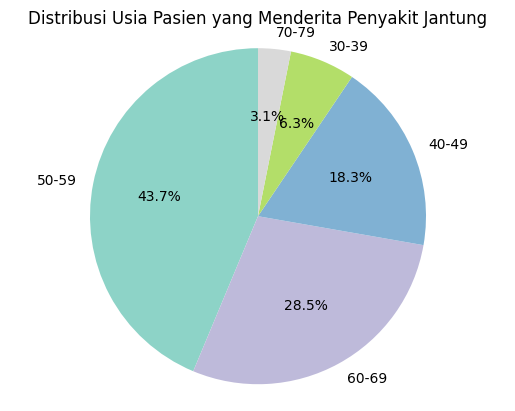

In [ ]:
# Visualisasi Distribusi Pasien Penyakit Jantung Berdasarkan Usia
# Mengatur rentang range umur
age_ranges = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# Mengambil usia pasien yang menderita penyakit jantung
heart_disease_age = heart_df.loc[heart_df['HeartDisease'] == 1, 'Age']

# Menghitung jumlah pasien pada setiap range umur
age_counts = pd.cut(heart_disease_age, bins=[20, 30, 40, 50, 60, 70, 80, 100], labels=age_ranges).value_counts()

# Menyiapkan data untuk diagram lingkaran
labels = age_counts.index
sizes = age_counts.values
colors = plt.cm.Set3(np.linspace(0, 1, len(labels)))

# Menghapus range umur dengan persentase 0
labels = [label for label, size in zip(labels, sizes) if size > 0]
sizes = [size for size in sizes if size > 0]
colors = [color for color, size in zip(colors, sizes) if size > 0]

# Membuat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Mengatur aspek lingkaran menjadi lingkaran
plt.axis('equal')

# Menambahkan judul
plt.title('Distribusi Usia Pasien yang Menderita Penyakit Jantung')

# Menampilkan diagram lingkaran
plt.show()

In [ ]:
# Menampilkan Jumlah Baris dengan Nilai 0 pada RestingBP dan Cholesterol dalam DataFrame untuk membersihkan Data

print(f"Jumlah baris yang memiliki nilai 0 untuk RestingBP: {(heart_df['RestingBP'] == 0).sum()}")

print(f"Jumlah baris yang memiliki nilai 0 untuk Cholesterol: {(heart_df['Cholesterol'] == 0).sum()}")

Jumlah baris yang memiliki nilai 0 untuk RestingBP: 1
Jumlah baris yang memiliki nilai 0 untuk Cholesterol: 172


In [ ]:
# Menampilkan statistik deskriptif
heart_clean_df[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,918.000000,918.000000
mean,239.675381,132.540305
std,54.328249,17.989941
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


In [ ]:
# Mengonversi Variabel Kategorikal untuk Rekayasa Fitur
# Mengonversi variabel kategorikal menjadi variabel tiruan
heart_clean_df = pd.get_dummies(heart_clean_df, drop_first=True)

# Menampilkan dataframe
heart_clean_df.head().T

,0,1,2,3,4
Age,40.0,49.0,37.0,48.0,54.0
RestingBP,140.0,160.0,130.0,138.0,150.0
Cholesterol,289.0,180.0,283.0,214.0,195.0
FastingBS,0.0,0.0,0.0,0.0,0.0
MaxHR,172.0,156.0,98.0,108.0,122.0
Oldpeak,0.0,1.0,0.0,1.5,0.0
HeartDisease,0.0,1.0,0.0,1.0,0.0
Sex_M,1.0,0.0,1.0,0.0,1.0
ChestPainType_ATA,1.0,0.0,1.0,0.0,0.0
ChestPainType_NAP,0.0,1.0,0.0,0.0,1.0


In [ ]:
# Menampilkan Jumlah Kolom dengan Variabel Dummy
print(f'Jumlah kolom dengan variabel dummy: {heart_clean_df.shape[1]}')

Jumlah kolom dengan variabel dummy: 16


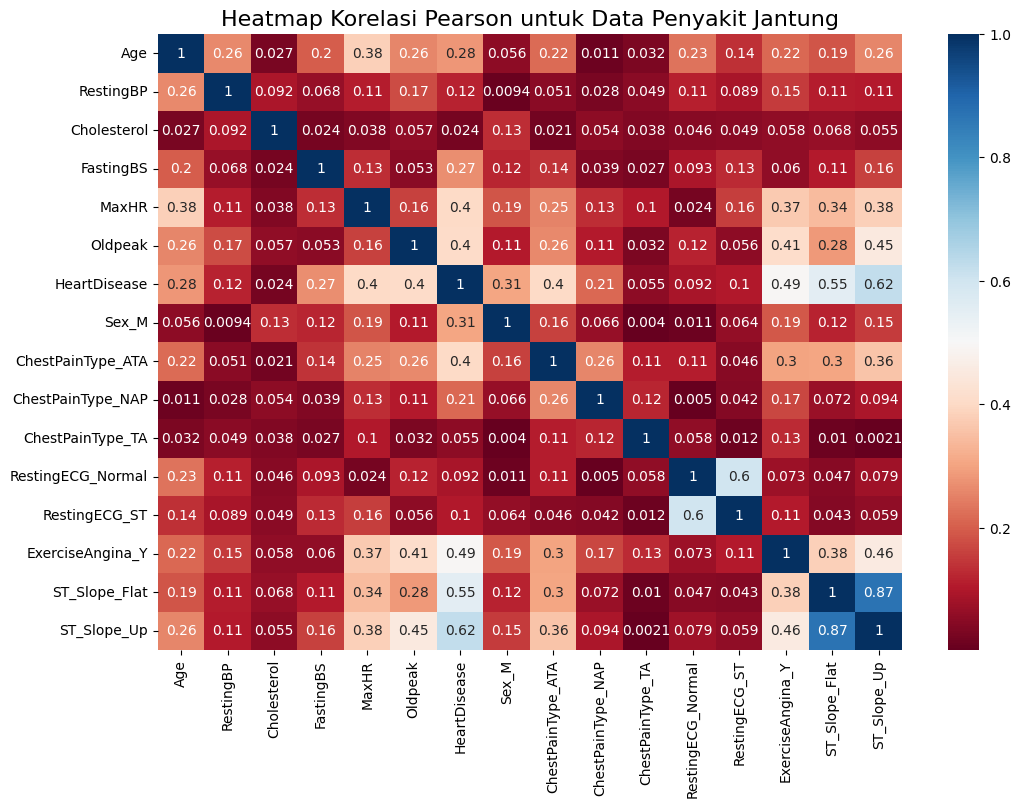

In [ ]:
# Visualisasi Heatmap Korelasi Pearson untuk Fitur-Fitur pada Penyakit Jantung
# Menghitung matriks korelasi Pearson
corr_mat = abs(heart_clean_df.corr())

# Membuat palet warna
colors = sns.color_palette("RdBu", n_colors=256)

# Membuat heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_mat, annot=True, cmap=colors)
plt.title("Heatmap Korelasi Pearson untuk Data Penyakit Jantung", fontsize=16)

# Menampilkan heatmap
plt.show()

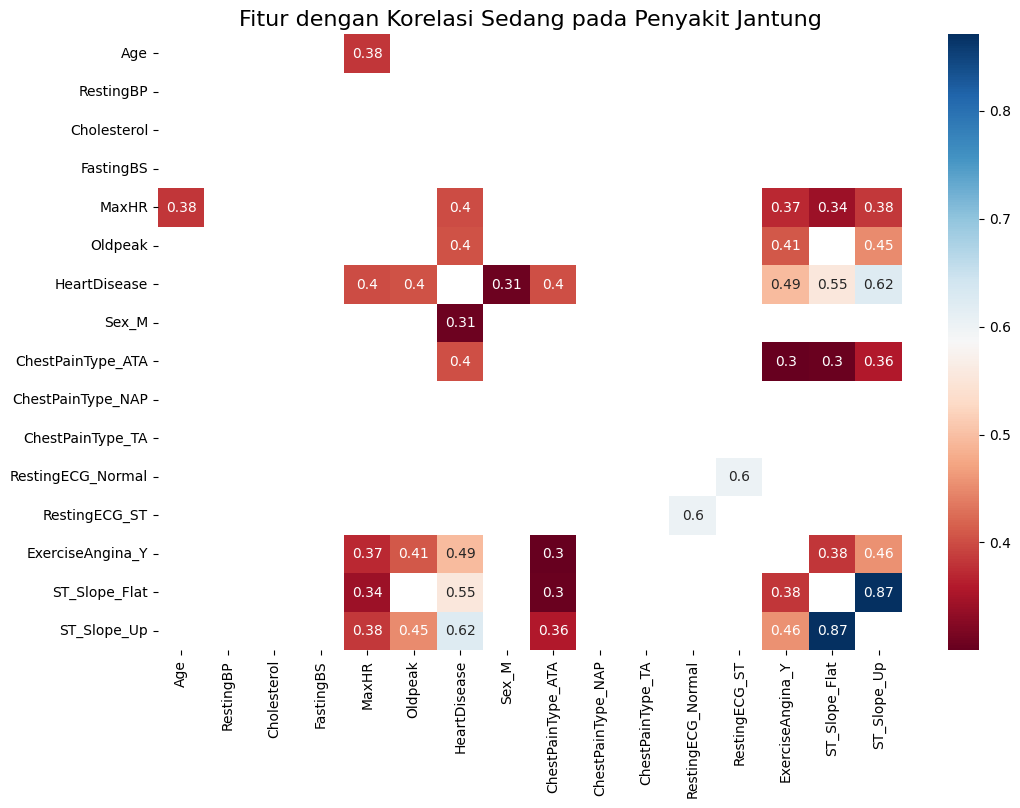

In [ ]:
# Visualisai Heatmap dengan Korelasi Sedang untuk Fitur-Fitur pada Penyakit Jantung
# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(12, 8))

# Mengatur rentang korelasi yang diinginkan
corr_range = (corr_mat > 0.3) & (corr_mat < 1)

# Membuat palet warna
colors = sns.color_palette("RdBu", n_colors=256)

# Membuat heatmap dengan korelasi yang memenuhi rentang yang diinginkan
sns.heatmap(corr_mat[corr_range], annot=True, cmap=colors)

# Menambahkan judul
plt.title('Fitur dengan Korelasi Sedang pada Penyakit Jantung', size=16)

# Menampilkan heatmap
plt.show()


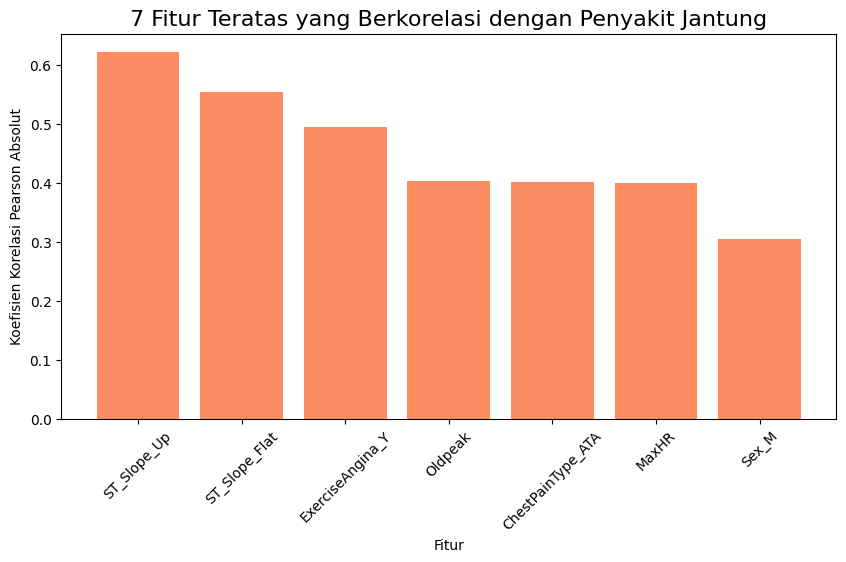

In [ ]:
# Visualisasi Diagram Batang untuk 7 Fitur Teratas yang Berkorelasi dengan Penyakit Jantung
# Memilih 7 fitur teratas menggunakan kuadrat korelasi Pearson
top_7_features = (corr_mat['HeartDisease'] ** 2).sort_values(ascending=False)[1:8].index.tolist()

# Membuat diagram batang
plt.figure(figsize=(10, 5))
colors = plt.get_cmap('Set2')(1)
plt.bar(x=top_7_features, height=corr_mat.loc[top_7_features, 'HeartDisease'], color=colors)
plt.xticks(rotation=45)

# Menambahkan judul dan label sumbu
plt.title('7 Fitur Teratas yang Berkorelasi dengan Penyakit Jantung', fontsize=16)
plt.ylabel('Koefisien Korelasi Pearson Absolut')
plt.xlabel('Fitur')

# Menampilkan diagram batang
plt.show()


In [ ]:
# Memisahkan data menjadi fitur 'X' dan variabel target 'y'
X = heart_clean_df.drop('HeartDisease', axis=1)
y = heart_clean_df['HeartDisease']

# Membuat daftar fitur yang dipilih
sel_features = [
                'MaxHR',
                'Oldpeak',
                'Sex_M',
                'ChestPainType_ATA',
                'ExerciseAngina_Y',
                'ST_Slope_Flat',
                'ST_Slope_Up'
]

# Membuat daftar ukuran pengujian yang akan dieksplorasi
test_sizes = [0.10, 0.15, 0.20, 0.25]

# Membuat kamus untuk menyimpan hasil dalam kamus utama.
results = {}

# Melakukan perulangan untuk setiap ukuran pengujian
for test_size in test_sizes:
    # Memisahkan data menjadi set pelatihan dan validasi
    X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                      test_size=test_size,
                                                      random_state=42)
# Membuat kamus untuk menyimpan hasil untuk ukuran pengujian saat ini
    test_results = {}

# Melakukan perulangan untuk setiap fitur yang dipilih
    for feature in sel_features:
        # Melatih klasifikasi KNN dengan set fitur saat ini
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train[[feature]], y_train)

        # Mengevaluasi akurasi pada set validasi
        accuracy = knn.score(X_val[[feature]], y_val)

        # Menyimpan akurasi dalam kamus test_results
        test_results[feature] = round(accuracy, 4)

  # Menyimpan hasil dari ukuran pengujian saat ini dalam kamus utama
    results[test_size] = test_results

In [ ]:
# Membuat daftar untuk menyimpan kamus-kamus
results_list = []

# Melakukan perulangan untuk nilai ukuran pengujian
for size, features in results.items():
    # Melakukan Perulangan fitur untuk nilai k saat ini
    for feature, accuracy in features.items():
        #Membuat kamus dengan ukuran pengujian, fitur, dan kunci akurasi
        result_dict = {'size': size, 'feature': feature, 'accuracy': accuracy}

        # Menambahkan ke daftar hasil
        results_list.append(result_dict)

# Mengonversi daftar kamus mejadi dataframe
test_size_df = pd.DataFrame(results_list)
test_size_df


,size,feature,accuracy
0,0.10,MaxHR,0.6739
1,0.10,Oldpeak,0.7065
2,0.10,Sex_M,0.6630
3,0.10,ChestPainType_ATA,0.6739
4,0.10,ExerciseAngina_Y,0.5870
5,0.10,ST_Slope_Flat,0.7174
6,0.10,ST_Slope_Up,0.4130
7,0.15,MaxHR,0.6014
8,0.15,Oldpeak,0.6667
9,0.15,Sex_M,0.6522


In [ ]:
# Memisahkan data menjadi data latihan (80%) dan validasi (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

# Daftar nilai k (n_neighbors)
k_values = [1, 3, 5, 7, 10]

# Membuat kamus dari kamus untuk menyimpan hasil
results = {}

# Melakukan perulangan untuk setiap nilai k
for value in k_values:

    # Membuat kamus untuk menyimpan hasil untuk nilai k saat ini
    test_results = {}

    # Melakukan perulangan untuk setiap fitur yang dipilih
    for feature in sel_features:

        # Melatih klasifikasi KNN dengan set fitur saat ini
        knn = KNeighborsClassifier(n_neighbors=value)
        knn.fit(X_train[[feature]], y_train)

         # Mengevaluasi akurasi pada set validasi
        accuracy = knn.score(X_val[[feature]], y_val)

        # Menyimpan akurasi dalam kamus test_results
        test_results[feature] = round(accuracy, 4)

    # Menyimpan hasil dari nilai k saat ini dalam kamus utama
    results[value] = test_results




In [ ]:
# Membuat daftar untuk menyimpan kamus
results_list = []

# Melakukan perulangan untuk setiap nilai k
for k, features in results.items():

    # Melakukan perulangan untuk fitur pada nilai k saat ini
    for feature, accuracy in features.items():
        # Membuat kamus dengan kunci 'n_neighbor', 'feature', dan 'accuracy'
        result_dict = {'n_neighbor': k, 'feature': feature, 'accuracy': accuracy}
         # Menambahkan kamus ke dalam daftar hasil
        results_list.append(result_dict)

# Mengonversi daftar kamus menjadi DataFrame
k_values_df = pd.DataFrame(results_list)
k_values_df

,n_neighbor,feature,accuracy
0,1,MaxHR,0.5652
1,1,Oldpeak,0.5707
2,1,Sex_M,0.5815
3,1,ChestPainType_ATA,0.4185
4,1,ExerciseAngina_Y,0.6576
5,1,ST_Slope_Flat,0.5815
6,1,ST_Slope_Up,0.7989
7,3,MaxHR,0.6141
8,3,Oldpeak,0.6522
9,3,Sex_M,0.4185


In [ ]:
# Memisahkan data menjadi set pelatihan dan validasi
X_train, X_val, y_train, y_val = train_test_split(X[sel_features], y,
                                                  test_size=0.15,
                                                  random_state=42)

# Menginisialisasi scaler
scaler = MinMaxScaler()

# Sesuaikan dan ubah fitur yang dipilih dalam set pelatihan
X_train_scaled = scaler.fit_transform(X_train)
# Mentransformasikan fitur yang sama dalam set validasi
X_val_scaled = scaler.transform(X_val)

# Melatih model pada fitur yang telah diubah skala (menggunakan nilai n_neighbors default)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)


# Mengevaluasi model pada fitur yang telah diubah skala
accuracy = knn.score(X_val_scaled, y_val)

print(f'Akurasi Model: {accuracy*100:.2f}%')



Akurasi Model: 79.71%


In [ ]:
# Memisahkan data menjadi data latihan (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X[sel_features], y,
                                                    test_size=0.20,
                                                    random_state=42)

# Membuat daftar fitur yang dipilih
sel_features = [
                'MaxHR',
                'Oldpeak',
                'Sex_M',
                'ChestPainType_ATA',
                'ExerciseAngina_Y',
                'ST_Slope_Flat',
                'ST_Slope_Up'
]

# Menginisialisasi scaler
scaler = MinMaxScaler()

# Melakukan penskalaan pada set data latihan
X_train_scaled = scaler.fit_transform(X_train)




In [ ]:
# Mendefinisikan grid parameter untuk GridSearchCV
params = {'n_neighbors': list(range(1,21)),
          'weights': ['uniform', 'distance'],
          'metric': ['minkowski', 'manhattan']}

# Menginisialisasi model
knn = KNeighborsClassifier()

# Membuat instance GridSearchCV
knn_grid = GridSearchCV(estimator=knn, param_grid=params, scoring='accuracy')
# Fit the instance (knn_grid)
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Mendapatkan skor terbaik dan parameter terbaik
best_score = knn_grid.best_score_
best_params = knn_grid.best_params_

print(f'Skor terbaik: {best_score*100:0.2f}%')
print(f'Parameter terbaik: {best_params}')

Skor terbaik: 85.42%
Parameter terbaik: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


In [ ]:
# Melakukan penskalaan pada fitur yang sama dari set data uji
X_test_scaled = scaler.transform(X_test)

# Memilih estimator terbaik untuk melakukan prediksi
best_model = knn_grid.best_estimator_

# Melakukan prediksi pada set data uji
predictions = best_model.predict(X_test_scaled)

# Menghitung akurasi
accuracy = accuracy_score(y_test, predictions)
print(f'Akurasi Model: {accuracy*100:.2f}%')


# Membuat kamus kosong untuk menyimpan hasil
results = {}

Akurasi Model: 80.43%


In [ ]:
# Memisahkan data menjadi set data latihan dan uji menggunakan nilai random_state yang berbeda
random_states = [0, 415, 417, 419, 2023]

# Melakukan perulangan untuk setiap nilai random_states
for state in random_states:
    # Memisahkan data menjadi set data latihan dan uji
    X_train, _, y_train, _ = train_test_split(X[sel_features], y, test_size=0.15, random_state=state)

    # Menginisialisasi scaler
    scaler = MinMaxScaler()

    # Melakukan penskalaan pada fitur data latihan
    X_train_scaled = scaler.fit_transform(X_train)

    # Membuat objek KNN classifier
    knn = KNeighborsClassifier()

    # Mendefinisikan grid parameter untuk GridSearchCV
    params = {'n_neighbors': list(range(1, 21)), 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'manhattan']}

    # Membuat objek GridSearchCV dengan parameter yang berbeda
    knn_grid = GridSearchCV(estimator=knn, param_grid=params, scoring='accuracy')

    # Melatih model dengan data latihan
    knn_grid.fit(X_train_scaled, y_train)

    # Mendapatkan skor terbaik dan parameter terbaik
    best_score = knn_grid.best_score_
    best_params = knn_grid.best_params_

    # Menyimpan hasil dalam kamus
    results[f'random_state_{state}'] = {'skor_terbaik': round(best_score*100,2), 'parameter_terbaik': best_params}

# Mengonversi kamus hasil menjadi dataframe
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df

,skor_terbaik,parameter_terbaik
random_state_0,85.00,"{'metric': 'minkowski', 'n_neighbors': 20, 'weights': 'uniform'}"
random_state_415,84.62,"{'metric': 'minkowski', 'n_neighbors': 20, 'weights': 'uniform'}"
random_state_417,83.97,"{'metric': 'minkowski', 'n_neighbors': 18, 'weights': 'uniform'}"
random_state_419,84.62,"{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}"
random_state_2023,83.97,"{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}"


In [ ]:
# Memisahkan data menjadi set data latihan dan uji
X_train, X_test, y_train, y_test = train_test_split(X[sel_features], y,
                                                    test_size=0.15,
                                                    random_state=0)

# Menginisialisasi MinMax scaler
scaler = MinMaxScaler()

# Melakukan penskalaan pada fitur data latihan dan uji
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat model
knn = KNeighborsClassifier(n_neighbors=14, weights='uniform', metric='minkowski')

# Melatih model dengan set data latihan
knn.fit(X_train_scaled, y_train)

# Melakukan prediksi menggunakan model pada set data uji
predictions = knn.predict(X_test_scaled)

# Menghitung akurasi
accuracy = accuracy_score(y_test, predictions)
print(f'Akurasi model pada set data uji: {accuracy*100:.2f}%')

Akurasi model pada set data uji: 81.88%


In [ ]:
# Menghitung presisi, recall, dan F1-score
report = classification_report(y_test, predictions)
print(report)


              precision    recall  f1-score   support

           0       0.79      0.78      0.78        58
           1       0.84      0.85      0.84        80

    accuracy                           0.82       138
   macro avg       0.81      0.81      0.81       138
weighted avg       0.82      0.82      0.82       138

